In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import time
%matplotlib notebook
sn.set_style("ticks",sn.axes_style({'axes.grid': True}))

def distance(a,b):
    d = np.sqrt( (b[0]-a[0])**2 + (b[1]-a[1])**2 + (b[2]-a[2])**2 )
    return d

In [3]:
random = np.loadtxt('100k_weighted_random.dat')
data = np.loadtxt('100k_weighted_north_cmass.dat')
dt=data.transpose()
rt=random.transpose()

In [4]:
'''plt.figure()
ax=plt.axes(projection="3d")
ax.scatter(dt[0],dt[1],dt[3],s=2)

plt.figure()
plt.scatter(dt[0],dt[1],s=2,marker='H',alpha=0.1)

plt.figure()
plt.scatter(rt[0],rt[1],s=2,marker='H',alpha=0.1)



plt.figure()
zhist = plt.hist(dt[2],bins=75)

plt.figure()
cdhist =  plt.hist(dt[3],bins=75)'''

'plt.figure()\nax=plt.axes(projection="3d")\nax.scatter(dt[0],dt[1],dt[3],s=2)\n\nplt.figure()\nplt.scatter(dt[0],dt[1],s=2,marker=\'H\',alpha=0.1)\n\nplt.figure()\nplt.scatter(rt[0],rt[1],s=2,marker=\'H\',alpha=0.1)\n\n\n\nplt.figure()\nzhist = plt.hist(dt[2],bins=75)\n\nplt.figure()\ncdhist =  plt.hist(dt[3],bins=75)'

In [5]:
# z=v/c , v=h_0*d , z*c = h_0*d -> d=(z*c)/h_0
# ra = theta
# dec = phi

def spherical_to_cartesian(ar):

    newpts=[]

    for i in range(len(ar[0])):
        ra = np.deg2rad(ar[0,i])
        dec = np.deg2rad(ar[1,i])
        #zr=dt[2,i]
        cmd=ar[3,i]

        ############################

        x=cmd*np.cos(ra)*np.cos(dec)
        y=cmd*np.sin(ra)*np.cos(dec)
        z=cmd*np.sin(dec)

        ############################


        xyz=[x,y,z]
        
        newpts.append(xyz)
        
    return np.array(newpts).transpose()

In [6]:
d_conv=spherical_to_cartesian(dt)

#plt.figure()

#pts=plt.axes(projection='3d')
#pts.scatter(ptst[0],ptst[1],ptst[2],s=2)

r_conv=spherical_to_cartesian(rt)

#plt.figure()
#pts2=plt.axes(projection='3d')
#pts2.scatter(ptst[0],ptst[1],ptst[2],s=2)

In [31]:
rxpts = np.linspace(np.round(min(r_conv[0])),np.round(max(r_conv[0])),20)
rypts = np.linspace(np.round(min(r_conv[1])),np.round(max(r_conv[1])),20)
rzpts = np.linspace(np.round(min(r_conv[2])),np.round(max(r_conv[2])),20)

dxpts = np.linspace(np.round(min(d_conv[0])),np.round(max(d_conv[0])),20)
dypts = np.linspace(np.round(min(d_conv[1])),np.round(max(d_conv[1])),20)
dzpts = np.linspace(np.round(min(d_conv[2])),np.round(max(d_conv[2])),20)

In [32]:
ddivs_master = {}

xwidth=dxpts[1]-dxpts[0]
ywidth=dypts[1]-dypts[0]
zwidth=dzpts[1]-dzpts[0]

x,y,z=d_conv[0],d_conv[1],d_conv[2]

ddivs = []

for a,i in enumerate(dxpts[0:19]):

    index_x0 = x>i
    index_x1 = x<= i+xwidth

    for b,j in enumerate(dypts[0:19]):

        index_y0 = y>j
        index_y1 = y<= j+ywidth
        
        for c,k in enumerate(dzpts[0:19]):
                  
            index_z0 = z>k
            index_z1 = z<= k+zwidth
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            ddivs.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            ddivs_master[key] = [xsub,ysub,zsub]


In [33]:
rdivs_master = {}

xwidth=rxpts[1]-rxpts[0]
ywidth=rypts[1]-rypts[0]
zwidth=rzpts[1]-rzpts[0]

x,y,z=r_conv[0],r_conv[1],r_conv[2]

rdivs = []

for a,i in enumerate(rxpts[0:19]):

    index_x0 = x>i
    index_x1 = x<= i+xwidth

    for b,j in enumerate(rypts[0:19]):

        index_y0 = y>j
        index_y1 = y<= j+ywidth
        
        for c,k in enumerate(rzpts[0:19]):
                  
            index_z0 = z>k
            index_z1 = z<= k+zwidth
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            rdivs.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            rdivs_master[key] = [xsub,ysub,zsub]


In [35]:
'''plt.figure()
ax = plt.axes(projection='3d')

for i in range(0,19):
    for j in range(0,19):
        for k in range(0,19):
            key = "%02d%02d%02d" % (i,j,k)
            ax.scatter(ddivs_master[key][0],ddivs_master[key][1],ddivs_master[key][2],s=20,marker='.')
            
plt.title('Party Sphere')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')'''

'plt.figure()\nax = plt.axes(projection=\'3d\')\n\nfor i in range(0,19):\n    for j in range(0,19):\n        for k in range(0,19):\n            key = "%02d%02d%02d" % (i,j,k)\n            ax.scatter(ddivs_master[key][0],ddivs_master[key][1],ddivs_master[key][2],s=20,marker=\'.\')\n            \nplt.title(\'Party Sphere\')\nax.set_xlabel(\'x\')\nax.set_ylabel(\'y\')\nax.set_zlabel(\'z\')'

In [ ]:
'''### DD ###

dd=[]

for idiv in range(0,len(ddivs)-1):
    
    subdiv = np.array(ddivs[idiv]).transpose()
    
    for jdiv in range(idiv+1,64):
    
        subdiv2 = np.array(ddivs[jdiv]).transpose()
        
        for j in range(0,len(subdiv)):
        
            pos1=subdiv[j]
            pos2=subdiv2[:].transpose()
            dist=distance(pos1,pos2)
            dd += dist.tolist()
            
for idiv in range(0,len(ddivs)):
    
    subdiv = np.array(ddivs[idiv]).transpose()
    
    for i in range(0,len(subdiv)-1):
        pos1=subdiv[i]
        pos2=np.array(subdiv[i+1:]).transpose()
        dist=distance(pos1,pos2)
        dd+=dist.tolist()

plt.figure()
hist_dd=plt.hist(dd,bins=200,range=(0,1000))
sn.despine()
print(len(dd))'''

In [ ]:
'''### DR ###

dr=[]

start = time.time()

for idiv in range(0,64):
    
    subdiv1 = np.array(ddivs[idiv]).transpose()
    
    for jdiv in range(0,64):
        
        #print(idiv+1,jdiv+1) #debug
    
        subdiv2 = np.array(rdivs[jdiv]).transpose()
        
        for j in range(0,len(subdiv1)):
        
            pos1=subdiv1[j]
            pos2=subdiv2.transpose()
            dist=distance(pos1,pos2)
            dr += dist.tolist()
            
end = time.time()

print("Done! (DR) Took %.2f seconds"%(end-start))
print("%.2e datapoints."%(len(dr)))

plt.figure()
hist_dr=plt.hist(dr,bins=200,range=(0,1000))
sn.despine()
print(len(dr))'''

In [ ]:
'''## RR ###

rr=[]
""
for idiv in range(0,len(rdivs)-1):
    
    subdiv = np.array(rdivs[idiv]).transpose()
    
    for jdiv in range(idiv+1,64):
    
        subdiv2 = np.array(rdivs[jdiv]).transpose()
        
        for j in range(0,len(subdiv)):
        
            pos1=subdiv[j]
            pos2=subdiv2[:].transpose()
            dist=distance(pos1,pos2)
            rr += dist.tolist()
            
for idiv in range(0,len(rdivs)):
    
    subdiv = np.array(rdivs[idiv]).transpose()
    
    for i in range(0,len(subdiv)-1):
        pos1=subdiv[i]
        pos2=np.array(subdiv[i+1:]).transpose()
        dist=distance(pos1,pos2)
        rr+=dist.tolist()

plt.figure()
hist_rr=plt.hist(rr,bins=200,range=(0,1000))
sn.despine()
print(len(rr))'''

In [ ]:
'''norm = (((1e4)**2)-1e4)/2.0
dr_norm = (1e4)**2

zeta = (hist_dd[0]/norm - 2*hist_dr[0]/dr_norm + hist_rr[0]/norm)/(hist_rr[0]/norm)
#zeta = (hist_dd[0] - 2*hist_dr[0] + hist_rr[0])/(hist_rr[0])


plt.figure()
plt.plot(hist_dd[1][0:-1],zeta,'c-')
plt.plot(hist_dd[1][0:-1],zeta,'mo',markersize=3)

sn.despine()'''

In [41]:
######################################################################################
# nearest neighbor
######################################################################################

nsubs = 19

#dd=[]
#dr=[]
#rr=[]

#dd_hist = np.hist()
#dr_hist = np.hist()
#rr_hist = np.hist()

hist_dd = np.zeros(100)
hist_dr = np.zeros(100)
hist_rr = np.zeros(100)

start = time.time()
for i in range(nsubs):
    for j in range(nsubs):
        for k in range(nsubs):
            home = "%02d%02d%02d" % (i,j,k)
            #print(home)
            
            # Calculate the nearest neighbors for this one "home" subvolume
            for nni in range(i,i+2):
                for nnj in range(j,j+2):
                    for nnk in range(k,k+2):
                        if nni<nsubs and nnj<nsubs and nnk<nsubs:
                            nn = "%02d%02d%02d" % (nni,nnj,nnk)
                            #print("\t",nn)
                            
                            d_home_subdiv = np.array(ddivs_master[home]).transpose()
                            d_nn_subdiv = np.array(ddivs_master[nn]).transpose()
                            r_home_subdiv = np.array(rdivs_master[home]).transpose()
                            r_nn_subdiv = np.array(rdivs_master[nn]).transpose()
                            
                            for dpt in range(0,len(d_home_subdiv)):
                                pos1=d_home_subdiv[dpt]
                                pos2=d_nn_subdiv[:].transpose()
                                d_dist=distance(pos1,pos2)
                                #dd += d_dist.tolist()
                                dr_dist=distance(pos1,r_nn_subdiv[:].transpose())
                                #dr += dr_dist.tolist()
                                h_dd = np.histogram(d_dist,bins=100,range=(0,200))
                                hist_dd += h_dd[0]
                                
                                h_dr = np.histogram(dr_dist,bins=100,range=(0,200))
                                hist_dr += h_dr[0]
                            
                            for rpt in range(0,len(r_home_subdiv)):
                                pos1=r_home_subdiv[rpt]
                                pos2=r_nn_subdiv[:].transpose()
                                r_dist=distance(pos1,pos2)
                                #rr += r_dist.tolist()
                                
                                h_rr = np.histogram(r_dist,bins=100,range=(0,200))
                                hist_rr += h_rr[0]
                                
end=time.time()
print("Done! Took %.2f seconds" % (end-start))

Done! Took 24.89 seconds


In [ ]:
'''
plt.figure()
hist_dd=plt.hist(dd,bins=50,range=(0,200))
sn.despine()
print(len(dd))

plt.figure()
hist_dr=plt.hist(dr,bins=50,range=(0,200))
sn.despine()
print(len(dr))

plt.figure()
hist_rr=plt.hist(rr,bins=50,range=(0,200))
sn.despine()
print(len(rr))
'''

<IPython.core.display.Javascript object>


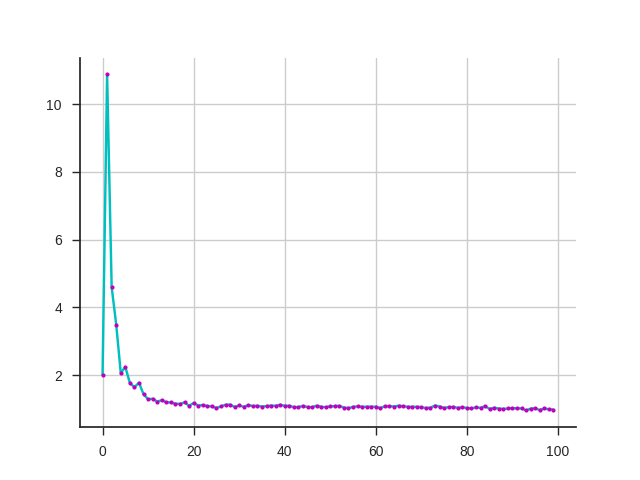

In [42]:


norm = (((1e4)**2)-1e4)/2.0
dr_norm = ((1e4)**2)/1.0

zeta = (hist_dd/norm - (2*hist_dr/dr_norm) + hist_rr/norm)/(hist_rr/norm)

#zeta = (hist_dd[0] - 2*hist_dr[0] + hist_rr[0])/(hist_rr[0])


plt.figure()
plt.plot(zeta,'c-')
plt.plot(zeta,'mo',markersize=3)
sn.despine()
